In [2]:
import pandas as pd
df=pd.read_csv("C:\\Users\\abhir\\OneDrive\\Desktop\\ADS\\gitstuff\\I501 Final Project\\Vegetables_Pulses2023.csv")
df

,Decade,Year,Item,Commodity,EndUse,PublishValue,Unit,Category,GeographicalLevel,Location
0,1970s,1970,Domestic availability,Artichokes,"Dual, fresh and processing",95.6000,Million pounds,Availability,Country,United States
1,1970s,1970,Total supply,Artichokes,"Dual, fresh and processing",95.6000,Million pounds,Supply,Country,United States
2,1970s,1970,Per capita availability,Artichokes,"Dual, fresh and processing",0.4662,Pounds,Availability,Country,United States
3,1970s,1970,Current dollars,Artichokes,"Dual, fresh and processing",10.3000,$/cwt,Season average price,Country,United States
4,1970s,1970,Production,Artichokes,"Dual, fresh and processing",67.1000,Million pounds,Supply,Country,United States
...,...,...,...,...,...,...,...,...,...,...
39148,2020s,2021,Production,Vegetables primary,All uses,25455.0000,Million cwt,Supply,Country,World
39149,2020s,2021,Production,Vegetables primary,All uses,13228.0000,Million cwt,Supply,Country,"China, mainland"
39150,2020s,2021,Production,Vegetables primary,All uses,7602.0000,Million cwt,Supply,Country,All other countries
39151,2020s,2021,Production,Vegetables primary,All uses,587.0000,Million cwt,Supply,Country,Turkey


In [3]:
df.dropna(inplace=True)
print(df.head(10))

  Decade  Year                     Item   Commodity  \
0  1970s  1970    Domestic availability  Artichokes   
1  1970s  1970             Total supply  Artichokes   
2  1970s  1970  Per capita availability  Artichokes   
3  1970s  1970          Current dollars  Artichokes   
4  1970s  1970               Production  Artichokes   
5  1970s  1970                  Imports  Artichokes   
6  1970s  1970    Constant 2012 dollars  Artichokes   
7  1970s  1971    Domestic availability  Artichokes   
8  1970s  1971             Total supply  Artichokes   
9  1970s  1971  Per capita availability  Artichokes   

                       EndUse  PublishValue            Unit  \
0  Dual, fresh and processing       95.6000  Million pounds   
1  Dual, fresh and processing       95.6000  Million pounds   
2  Dual, fresh and processing        0.4662          Pounds   
3  Dual, fresh and processing       10.3000           $/cwt   
4  Dual, fresh and processing       67.1000  Million pounds   
5  Dual, fresh a

In [4]:
df.drop_duplicates(inplace=True)


In [5]:
df.shape
df.head(10)

,Decade,Year,Item,Commodity,EndUse,PublishValue,Unit,Category,GeographicalLevel,Location
0,1970s,1970,Domestic availability,Artichokes,"Dual, fresh and processing",95.6000,Million pounds,Availability,Country,United States
1,1970s,1970,Total supply,Artichokes,"Dual, fresh and processing",95.6000,Million pounds,Supply,Country,United States
2,1970s,1970,Per capita availability,Artichokes,"Dual, fresh and processing",0.4662,Pounds,Availability,Country,United States
3,1970s,1970,Current dollars,Artichokes,"Dual, fresh and processing",10.3000,$/cwt,Season average price,Country,United States
4,1970s,1970,Production,Artichokes,"Dual, fresh and processing",67.1000,Million pounds,Supply,Country,United States
5,1970s,1970,Imports,Artichokes,"Dual, fresh and processing",28.5000,Million pounds,Supply,Country,United States
6,1970s,1970,Constant 2012 dollars,Artichokes,"Dual, fresh and processing",47.5158,$/cwt,Season average price,Country,United States
7,1970s,1971,Domestic availability,Artichokes,"Dual, fresh and processing",105.3000,Million pounds,Availability,Country,United States
8,1970s,1971,Total supply,Artichokes,"Dual, fresh and processing",105.3000,Million pounds,Supply,Country,United States
9,1970s,1971,Per capita availability,Artichokes,"Dual, fresh and processing",0.5071,Pounds,Availability,Country,United States


C:\Users\abhir\AppData\Local\Temp\ipykernel_23536\863469135.py:13: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


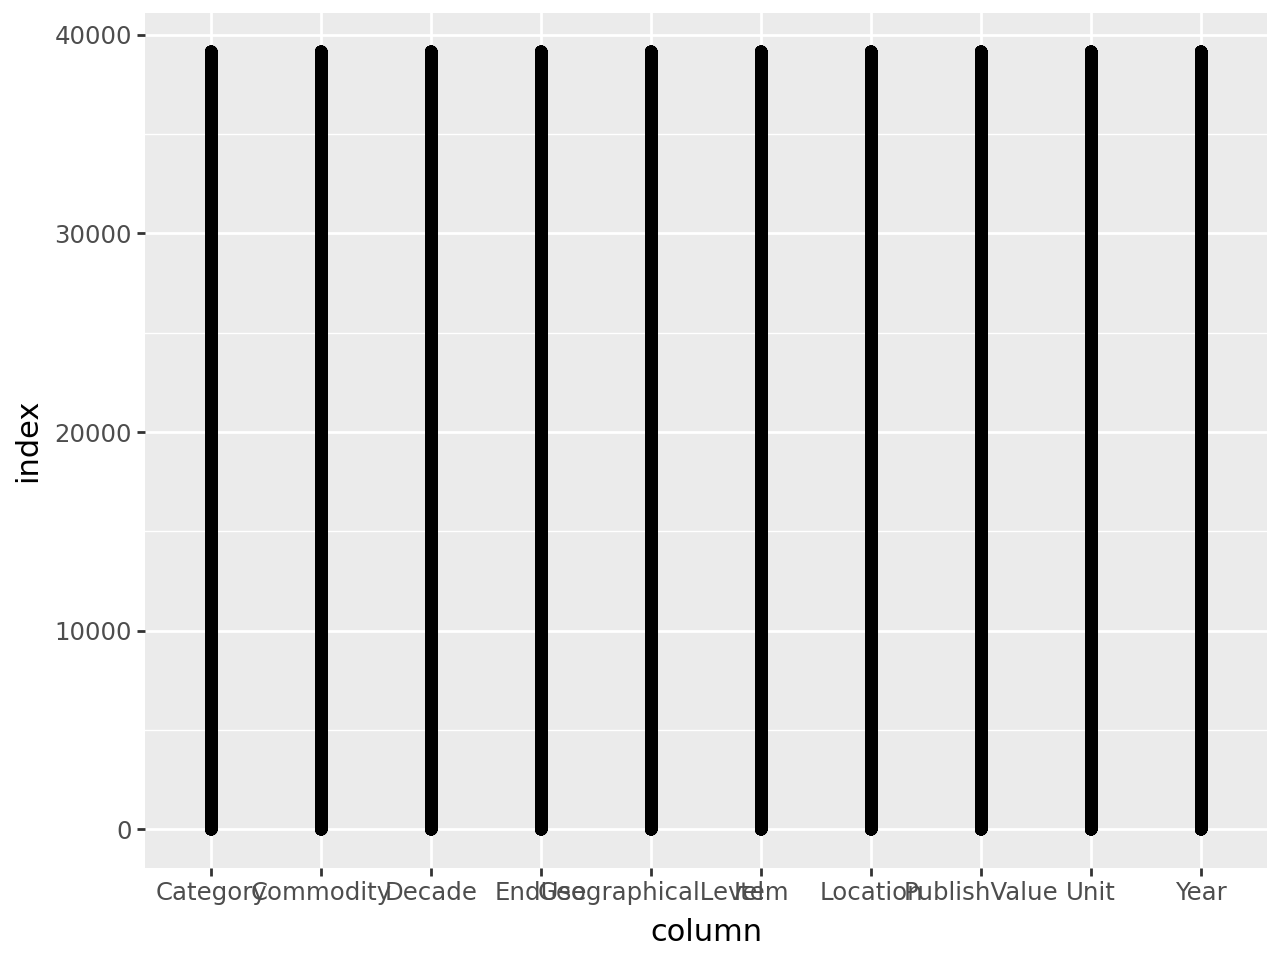

In [8]:
from plotnine import ggplot, aes, geom_point

# Reset the index to use the default integer index as the 'row' values
df.reset_index(inplace=True)

# Melt the DataFrame to convert columns to rows
melted_df = df.melt(id_vars=['index'], var_name='column', value_name='value')

# Create the plot
plot = ggplot(melted_df, aes(x='column', y='index')) + geom_point()

# Display the plot
print(plot)


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define function for ARIMA modeling
def arima_forecast(data, order):
    # Splitting data into training and testing sets
    train_size = int(len(data) * 0.8)
    train, test = data[0:train_size], data[train_size:]
    
    # Fit ARIMA model
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    
    # Forecast
    forecast, _, _ = model_fit.forecast(steps=len(test))
    
    # Calculate RMSE
    rmse = mean_squared_error(test, forecast, squared=False)
    print('Test RMSE: %.3f' % rmse)
    
    # Visualize forecast
    plt.figure(figsize=(10, 6))
    plt.plot(data.index[train_size:], test, label='Actual')
    plt.plot(data.index[train_size:], forecast, color='red', label='Forecast')
    plt.title('ARIMA Forecast')
    plt.xlabel('Year')
    plt.ylabel('Production (Million Pounds)')
    plt.legend()
    plt.grid(True)
    plt.show()






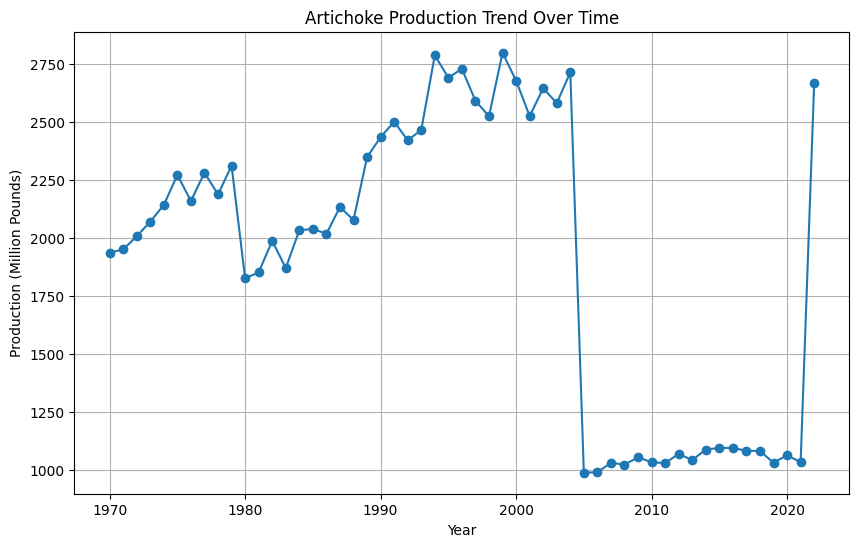

In [24]:
production_trend = production_df.groupby('Year')['PublishValue'].mean()

# Visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(production_trend.index, production_trend.values, marker='o', linestyle='-')
plt.title('Artichoke Production Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Production (Million Pounds)')
plt.grid(True)
plt.show()

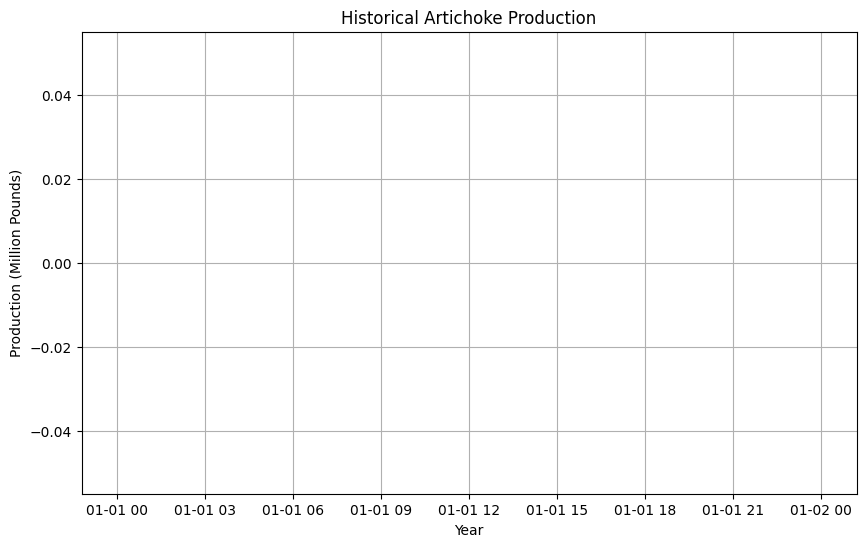

Forecasted values for the next 5 periods: 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: predicted_mean, dtype: float64


c:\conda\envs\i501_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\conda\envs\i501_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\conda\envs\i501_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\conda\envs\i501_1\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observation

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define the arima_forecast function
def arima_forecast(data, order):
    model = ARIMA(data, order=order)
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=5)  # Forecasting for the next 5 periods
    return forecast

# Assuming 'df' is your dataframe containing the production data
# Replace this line with your actual dataframe if needed
artichoke_df = df[df['Item'] == 'Artichokes']

# Convert 'Year' column to datetime format
artichoke_df['Year'] = pd.to_datetime(artichoke_df['Year'], format='%Y')

# Set 'Year' column as index
artichoke_df.set_index('Year', inplace=True)

# Visualize the historical artichoke production data
plt.figure(figsize=(10, 6))
plt.plot(artichoke_df.index, artichoke_df['PublishValue'], marker='o', linestyle='-')
plt.title('Historical Artichoke Production')
plt.xlabel('Year')
plt.ylabel('Production (Million Pounds)')
plt.grid(True)
plt.show()

# Perform ARIMA forecasting for artichoke production
order = (2, 1, 1)  # ARIMA parameters (p, d, q)
forecast = arima_forecast(artichoke_df['PublishValue'], order)
print("Forecasted values for the next 5 periods:", forecast)


In [20]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation with the 'PublishValue' column
production_correlation = correlation_matrix['PublishValue']
print("Correlation with Production:\n", production_correlation)


Correlation with Production:
 Year            0.038747
PublishValue    1.000000
Name: PublishValue, dtype: float64


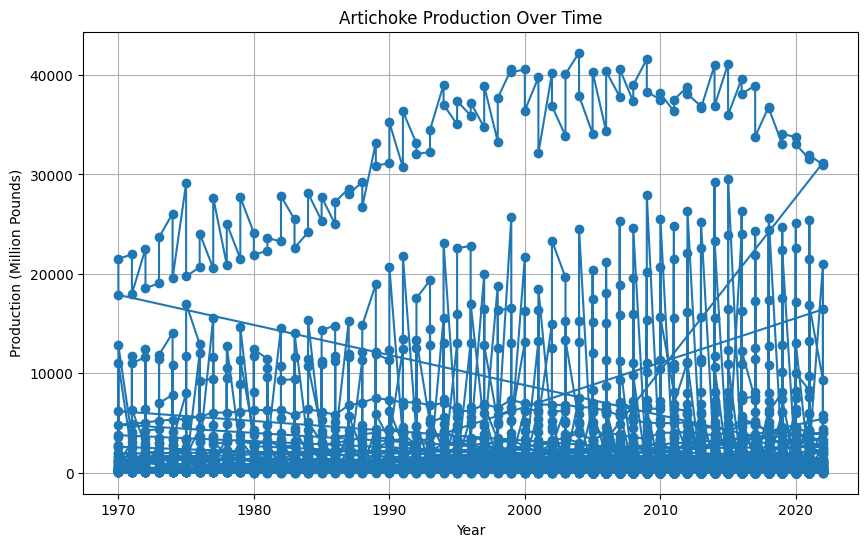

Summary Statistics for Production:
 count     7405.000000
mean      1487.872161
std       4656.210222
min          0.000000
25%         29.000000
50%        160.700000
75%        756.400000
max      42239.710000
Name: PublishValue, dtype: float64


In [23]:
production_df = df[df['Item'] == 'Production']
if not production_df.empty:
    # Visualize the trend of artichoke production over the years
    plt.figure(figsize=(10, 6))
    plt.plot(production_df['Year'], production_df['PublishValue'], marker='o', linestyle='-')
    plt.title('Artichoke Production Over Time')
    plt.xlabel('Year')
    plt.ylabel('Production (Million Pounds)')
    plt.grid(True)
    plt.show()
else:
    print("No data available for artichoke production.")

# Statistical Analysis
# Summary statistics for production
if not production_df.empty:
    production_summary = production_df['PublishValue'].describe()
    print("Summary Statistics for Production:\n", production_summary)

